In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data=pd.read_csv("Task1.csv")
data.head(5)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,20,0.0,0.0
1,1998,January,California,NaN,Custard,NaN,NaN,NaN,NaN,112,0.0,0.0
2,1998,January,California,Restaurant,NaN,NaN,NaN,NaN,NaN,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",NaN,Scombroid toxin,NaN,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",NaN,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [ ]:
data.tail(5)

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
19114,2015,December,Wisconsin,Restaurant,NaN,NaN,Norovirus genogroup II,GII_14,Confirmed,4,0.0,0.0
19115,2015,December,Wisconsin,Private Home/Residence,Salsa,NaN,Norovirus genogroup II,GII_2,Confirmed,16,0.0,0.0
19116,2015,December,Wisconsin,Nursing Home/Assisted Living Facility,NaN,NaN,Norovirus genogroup II,GII_17 Kawasaki (2014),Confirmed,43,3.0,0.0
19117,2015,December,Wisconsin,Fast Food Restaurant,NaN,NaN,Norovirus genogroup II,GII_2,Confirmed,5,0.0,0.0
19118,2015,December,Wyoming,NaN,NaN,NaN,NaN,NaN,NaN,3,0.0,0.0


In [ ]:
data.isnull().sum()

,0
Year,0
Month,0
State,0
Location,2166
Food,8963
Ingredient,17243
Species,6619
Serotype/Genotype,15212
Status,6619
Illnesses,0


In [ ]:
numerical_columns = ['Illnesses', 'Hospitalizations', 'Fatalities']

# Fill NaN values with the median of each column
data[numerical_columns] = data[numerical_columns].apply(lambda col: col.fillna(col.median()))

In [ ]:
string_columns = data.select_dtypes(include=['object']).columns

# Fill missing values in string columns with their mode
for col in string_columns:
    if data[col].mode().size > 0:  # Check if mode exists
        data[col] = data[col].fillna(data[col].mode()[0])
    else:
        data[col] = data[col].fillna('Unknown')

In [ ]:
import collections

# Function to find the most common word in a column
def most_common_word(column):
    # Split all string values into words, excluding "Unknown"
    words = [word for text in column.dropna() if text != "Unknown" for word in str(text).split()]
    # Count the frequency of each word
    if words:
        return collections.Counter(words).most_common(1)[0][0]
    return "Unknown"

# Replace "Unknown" in each string column with the most common word
for col in string_columns:
    most_common = most_common_word(data[col])
    data[col] = data[col].replace("Unknown", most_common)

In [ ]:
data.head()

,Year,Month,State,Location,Food,Ingredient,Species,Serotype/Genotype,Status,Illnesses,Hospitalizations,Fatalities
0,1998,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Enteritidis,Confirmed,20,0.0,0.0
1,1998,January,California,Restaurant,Custard,Fin Fish,Norovirus genogroup I,Enteritidis,Confirmed,112,0.0,0.0
2,1998,January,California,Restaurant,Multiple Foods,Fin Fish,Norovirus genogroup I,Enteritidis,Confirmed,35,0.0,0.0
3,1998,January,California,Restaurant,"Fish, Ahi",Fin Fish,Scombroid toxin,Enteritidis,Confirmed,4,0.0,0.0
4,1998,January,California,Private Home/Residence,"Lasagna, Unspecified; Eggs, Other",Fin Fish,Salmonella enterica,Enteritidis,Confirmed,26,3.0,0.0


In [ ]:
data.describe()

,Year,Illnesses,Hospitalizations,Fatalities
count,19119.000000,19119.000000,19119.000000,19119.000000
mean,2005.562373,19.537162,0.767875,0.017626
std,5.158404,49.452417,4.797041,0.348735
min,1998.000000,2.000000,0.000000,0.000000
25%,2001.000000,3.000000,0.000000,0.000000
50%,2005.000000,8.000000,0.000000,0.000000
75%,2010.000000,19.000000,0.000000,0.000000
max,2015.000000,1939.000000,308.000000,33.000000


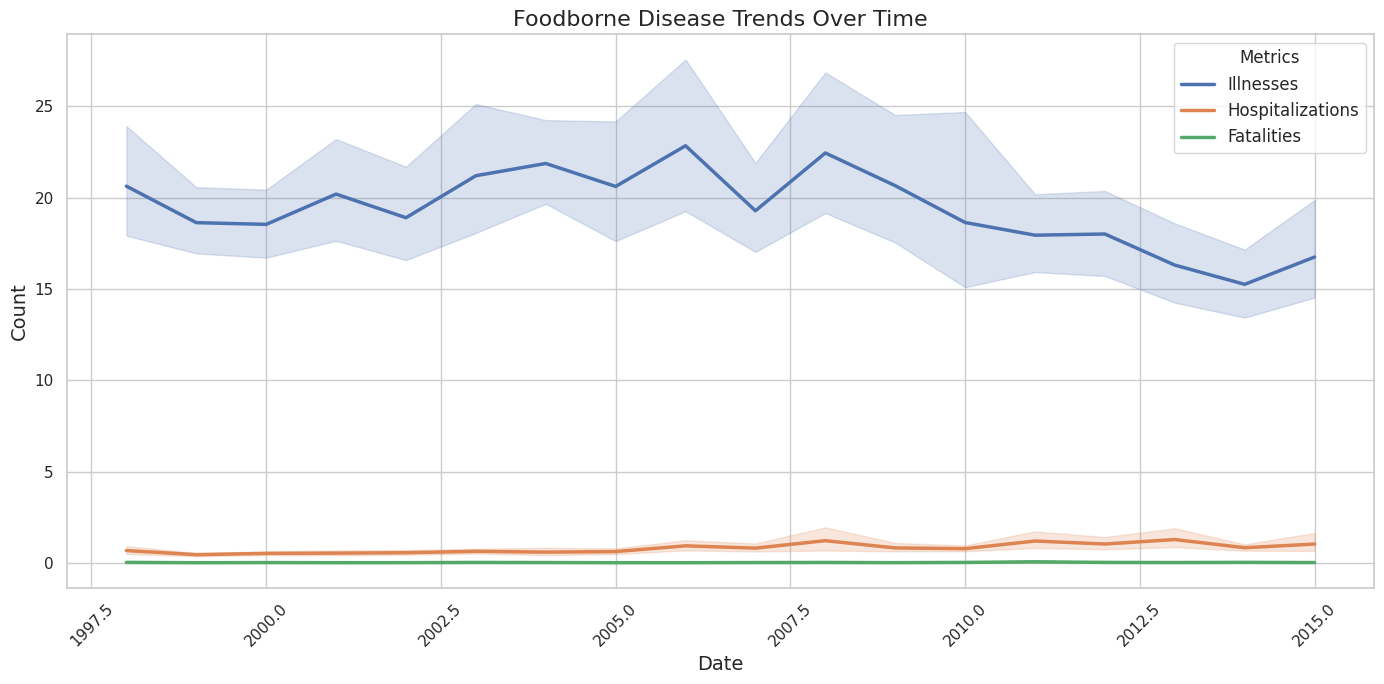

In [ ]:
trend_data = data.groupby('Year')[['Illnesses', 'Hospitalizations', 'Fatalities']].sum()

trend_data = data.reset_index()
##to check year wise increases or not
# Set the theme for seaborn
sns.set_theme(style="whitegrid")

# Plot the trends using Seaborn
plt.figure(figsize=(14, 7))
sns.lineplot(data=trend_data, x="Year", y="Illnesses", label="Illnesses", linewidth=2.5)
sns.lineplot(data=trend_data, x="Year", y="Hospitalizations", label="Hospitalizations", linewidth=2.5)
sns.lineplot(data=trend_data, x="Year", y="Fatalities", label="Fatalities", linewidth=2.5)

# Customize the plot
plt.title('Foodborne Disease Trends Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title="Metrics", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

Top contaminant by illnesses: Norovirus genogroup I
Top contaminant by hospitalizations: Salmonella enterica
Top contaminant by fatalities: Listeria monocytogenes


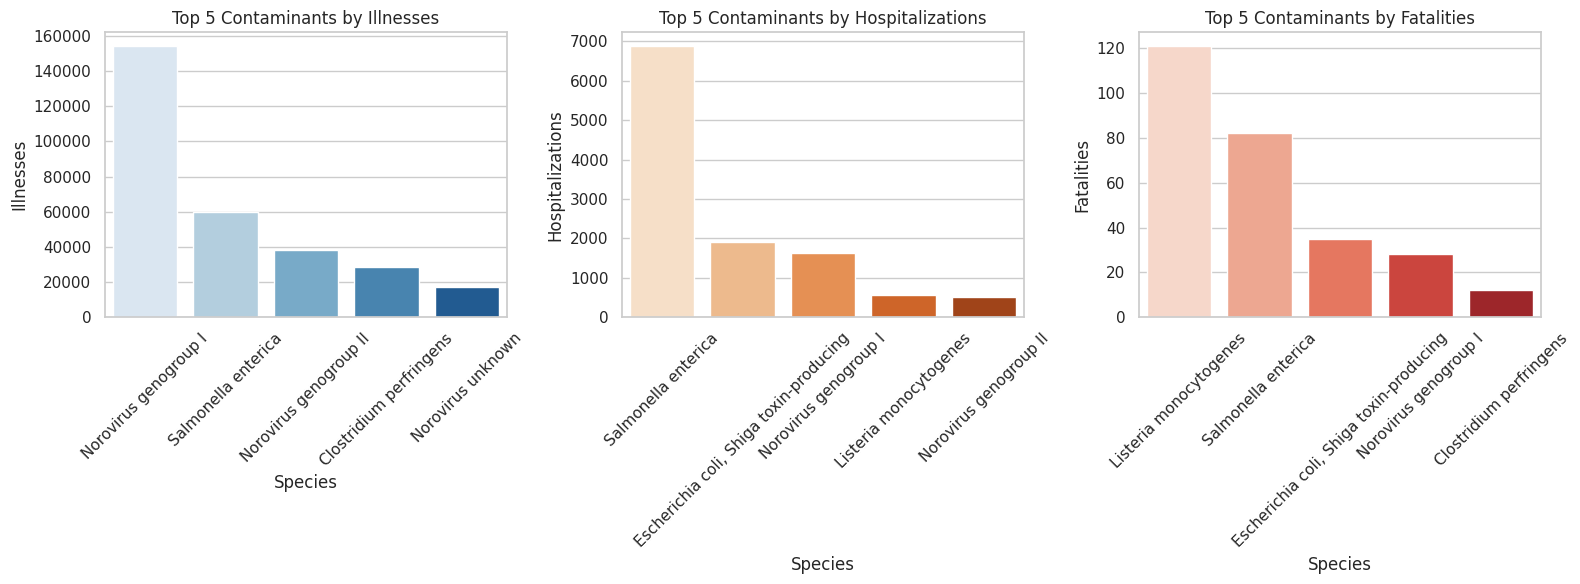

In [ ]:
##to check which species is most affected
contaminant_summary = data.groupby('Species')[['Illnesses', 'Hospitalizations', 'Fatalities']].sum()

# Find the top contaminant for each metric
top_illness_contaminant = contaminant_summary['Illnesses'].idxmax()
top_hospitalization_contaminant = contaminant_summary['Hospitalizations'].idxmax()
top_fatality_contaminant = contaminant_summary['Fatalities'].idxmax()

# Print results
print("Top contaminant by illnesses:", top_illness_contaminant)
print("Top contaminant by hospitalizations:", top_hospitalization_contaminant)
print("Top contaminant by fatalities:", top_fatality_contaminant)

# Visualize the data using bar plots
plt.figure(figsize=(16, 6))

# Plot for illnesses
plt.subplot(1, 3, 1)
sns.barplot(x=contaminant_summary['Illnesses'].nlargest(5).index,
            y=contaminant_summary['Illnesses'].nlargest(5).values, palette="Blues")
plt.title('Top 5 Contaminants by Illnesses')
plt.ylabel('Illnesses')
plt.xticks(rotation=45)

# Plot for hospitalizations
plt.subplot(1, 3, 2)
sns.barplot(x=contaminant_summary['Hospitalizations'].nlargest(5).index,
            y=contaminant_summary['Hospitalizations'].nlargest(5).values, palette="Oranges")
plt.title('Top 5 Contaminants by Hospitalizations')
plt.ylabel('Hospitalizations')
plt.xticks(rotation=45)

# Plot for fatalities
plt.subplot(1, 3, 3)
sns.barplot(x=contaminant_summary['Fatalities'].nlargest(5).index,
            y=contaminant_summary['Fatalities'].nlargest(5).values, palette="Reds")
plt.title('Top 5 Contaminants by Fatalities')
plt.ylabel('Fatalities')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Location with the greatest risk: Restaurant (197985 illnesses)


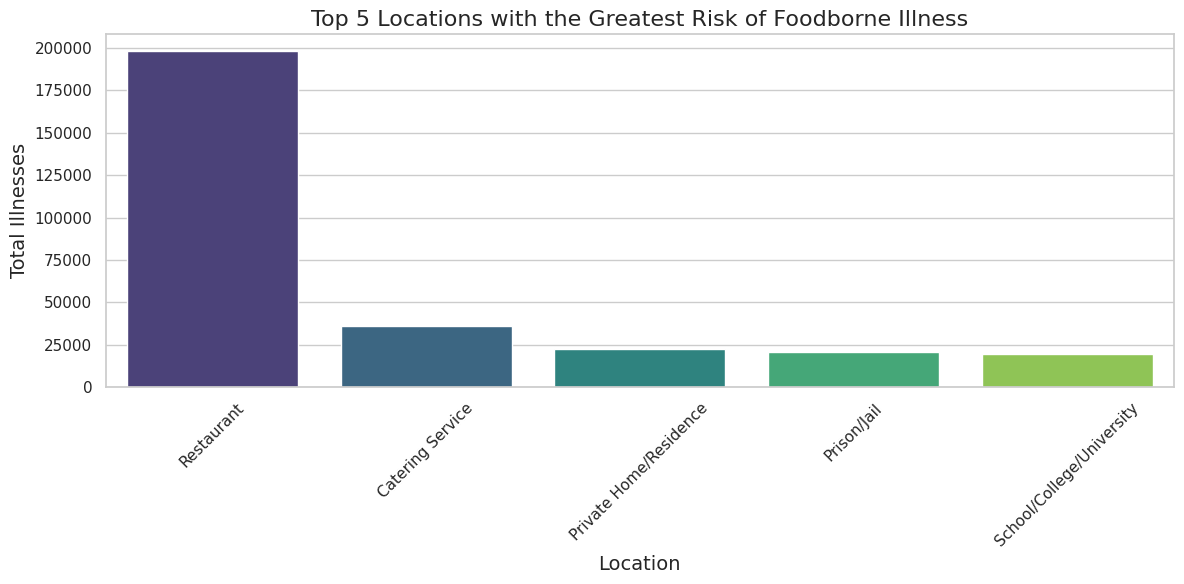

In [ ]:
##to check which location is most affected
location_risk = data.groupby('Location')['Illnesses'].sum().sort_values(ascending=False)

# Find the location with the highest risk
highest_risk_location = location_risk.idxmax()
highest_risk_illnesses = location_risk.max()

# Print the results
print(f"Location with the greatest risk: {highest_risk_location} ({highest_risk_illnesses} illnesses)")

# Visualize the top 5 locations with the greatest risk
plt.figure(figsize=(12, 6))
sns.barplot(x=location_risk.head(5).index, y=location_risk.head(5).values, palette="viridis")
plt.title('Top 5 Locations with the Greatest Risk of Foodborne Illness', fontsize=16)
plt.xlabel('Location', fontsize=14)
plt.ylabel('Total Illnesses', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()